# CV With python 
---

강사: Rajeev

50 exercises, 12 mini projects.

Computer Vision : Enable Computers to understand what's being seen in an image.

Challenging reason:

1. 카메라센서와 렌즈의 limits. low light condition에서 카메라로 이미지를 담아내면 노이즈가 심함. 이미지를 zoom in해서 segment를 볼 경우 pixilated img가 된다.
2. viewpoint variations, changing light conditions, scaling issues, not-rigid deformations, Occlustion (blocked img), background clutter (배경이 어수선한 이미지인 경우. 네온사인으로 가득찬 밤거리나, 돌에 붙어서 위장한 문어같은 거), object class variations. (다양한 종류의 object를 하나의 카테고리로 인식시키는 것)
4. ambiguous img with optical illusions. (착시현상 일으키는 사진들)

그럼에도 불구하고, 꽤 많은 성공사례들. 자율주행차가 그렇고, face recognition이 그렇고. image search engine, license plate recognitions, handwriting recognitions, object recognitions 등등.

### openCV

DS, ML에 강한 python, numpy로 operation 쉽게 처리 가능.

## Basics of CV and OpenCV


### What are images?

2-dim representation of the visible light spectrum.

dots per inch (dpi). each dots reflects diff wavelengths of lights. 얘네가 곧 visible light spectrum이 된다. 사람이 눈으로 볼 수 있는 wavelength는 정해져 있고 (적외선 같은 거 빼면), 이 wavelength의 크기에 따라 색깔이 달라진다.

### opencv?

written in C++. 2.0은 09년, 3.0이 15년에 released. 2.4.13이 OpenCV 2.x의 stable version이며, 3.0으로 올라갈 때 patent 문제 때문에 몇몇 중요한 알고리즘이 삭제되었다고 함 (SIFT, SURF). 

In [3]:
import cv2

In [4]:
import numpy as np
import glob

In [11]:
inputs = cv2.imread("./MasteringComputerVision-V1.03/Master OpenCV/images/input.jpg")
cv2.imshow("hello world", inputs)
cv2.waitKey()
# cv2.destroyAllWindows()

119

In [8]:
print(inputs.shape)
# height, width, RGB

(830, 1245, 3)


In [10]:
# 이미지 저장
cv2.imwrite("output.jpg", inputs)
cv2.imwrite("output.png", inputs)

# jpg, png 등 다양한 이미지형식 지원. 

True

### GrayScaling.

black / white 이미지로 변경하기.

앞서 로딩한 이미지 변경하기.

openCV에서 이미지 처리할 때, 선행작업으로 많이 요구하는 게 grayscale img로 변경하는 작업. less info / same segment of img이기 때문 (연산효율성)

In [16]:
# gray_img = cv2.cvtColor(inputs, cv2.COLOR_BGR2GRAY) 이렇게 바꿀 수도 있지만, 이미지 불러올 때 0값을 입력해서 바로 적용할 수도 있다.
gray_img = cv2.imread("./MasteringComputerVision-V1.03/Master OpenCV/images/input.jpg",0)
cv2.imshow('Grayscale', gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

### Color Space

RGB 외에도 HSV, CMYK 등등. color 표현하는 여러 방법들임.

opencv의 기본은 RGB. 정확히는 BGR format. 연산의 효율성 때문에 메인으로 쓰인다는 듯.

HSV - Hue (color, 0 - 179), Saturation(vibrancy of color, 0 - 255), value(brightness, 0 - 255). 

(low saturation에서는 다 흰색. high일수록 원색에 가까워진다. value의 경우 낮을수록 검은색에 가까워짐.)

attempts to represent colors the way human perceive it. (cylindrical representation of RGB color points)

#### Color Filtering에서 HSV가 꽤 유용하다.

Hue color range(0 - 179) -> map differently than standard.

red = 165 to 15, green = 45 to 75, blue = 90 to 120


In [21]:
# BGR value for the first [0,0] pixel
B, G, R = inputs[0,0]
print(B,G,R)

# gray img로 바꾸면 값이 하나로 줄어든다.
print(gray_img.shape)
print(gray_img[0,0])

12 18 29
(830, 1245)
21


In [23]:
# BGR to HSV 변환하기

hsv_image = cv2.cvtColor(inputs, cv2.COLOR_BGR2HSV)
cv2.imshow("hsv_img",hsv_image)
cv2.imshow('hue channel', hsv_image[:,:,0])
cv2.imshow('saturation channel', hsv_image[:,:,1])
cv2.imshow("value channel", hsv_image[:,:,2])

cv2.waitKey()
cv2.destroyAllWindows()

# brightness인 value를 보면 그냥 흑백이미지처럼 보인다. 실제로 value는 brightness만을 다루기 때문.

In [25]:
# openCV의 split은 BGR값을 구분해준다.
B, G, R = cv2.split(inputs)
print(B.shape)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)
cv2.destroyAllWindows()



(830, 1245)


In [26]:
# BGR 갖고 원래 이미지로 복구하기
merged = cv2.merge([B, G, R]) 
cv2.imshow("Merged", merged) 

# blue값 amplify
merged = cv2.merge([B+100, G, R])
cv2.imshow("Merged with Blue Amplified", merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# 빈 numpy array에 RGB값만 넣어서 확인해보기

zeros = np.zeros(inputs.shape[:2], dtype = 'uint8')

cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
cv2.destroyAllWindows()

### Histogram - to visualize individual color components

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

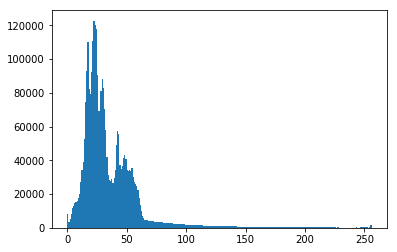

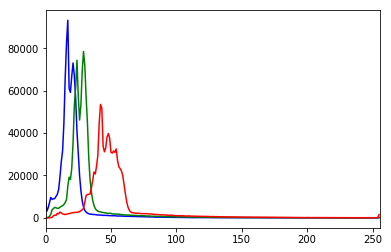

In [32]:
from matplotlib import pyplot as plt


histogram = cv2.calcHist([inputs], [0], None, [256], [0, 256])

# img array를 collapse하는 게 .ravel()
plt.hist(inputs.ravel(), 256, [0, 256]); plt.show()

color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histogram2 = cv2.calcHist([inputs], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()

# 이미지가 어두운 편이라서 값이 왼쪽으로 편중해 있다. 보통 밝은 이미지는 가운데에 분포가 많은 편.

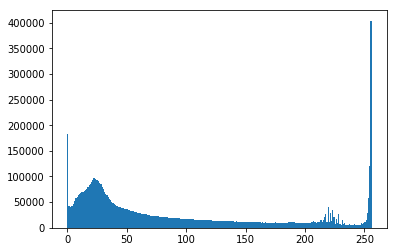

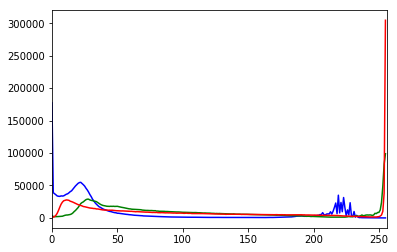

In [34]:
inputs2 = cv2.imread("./MasteringComputerVision-V1.03/Master OpenCV/images/tobago.jpg")

histogram = cv2.calcHist([inputs2], [0], None, [256], [0, 256])

plt.hist(inputs2.ravel(), 256, [0, 256]); plt.show()

color = ("b", "g", "r")


for i, col in enumerate(color):
    histogram2 = cv2.calcHist([inputs2], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()


In [36]:
cv2.imshow("tobago",inputs2)
cv2.waitKey(0)
cv2.destroyAllWindows()